In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List

def plotGraph(f, an:List, limit_inf:float, limit_sup:float):
    #f:function
    
    #create 100 equally spaced points between limit_inf and limit_sup
    x = np.linspace(limit_inf, limit_sup, 1000)
    #calculate the y value for each element of the x vector
    y:List = []
    for xk in x:
        y.append(f(xk))

    plt.plot(x, y)
    
    plt.axis([0, 1, -6, 6]) 
    plt.grid(b=True)
    for xn in an:
        plt.scatter(xn, f(xn), marker="o")

In [2]:
from typing import Tuple

def aproxSec(f, x0:float, x1:float, epsilon:float, n_iter:int) -> List:
    #f:function

    an:List = []
    an.append(x0)
    an.append(x1)
    
    xn:float = (x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
        
    for n in range(n_iter):
        
        an.append(xn)
        
        erro = abs(xn - an[len(an)-2])/abs(xn)
        if(abs(xn - an[len(an)-2])/abs(xn)) <= epsilon:
            print(f"Solução encontrada na {n+1}º iteração.")
            return xn, an, erro
        
        x0 = an[len(an)-2]
        x1 = an[len(an)-1]
        xn = (x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
        
    print(f"Fim das iterações. Solução não encontrada.")
    return None, an, erro

In [3]:
import math

g = lambda f : 1/math.sqrt(f) + 0.86859*math.log(0.000081081 + 0.0001826384341/math.sqrt(f))
x0:float = 0.008
x1:float = 0.01
epsilon:float = 1e-8
n_iter:int = 10

Solução encontrada na 8º iteração.
f(x) = 0 para x = 0.028967757416535136
(an) = [0.008, 0.01, 0.017163671607107082, 0.022613815862821962, 0.026964572541247483, 0.028640831711531124, 0.02895130491201995, 0.0289676232156868, 0.02896775736150763, 0.028967757416535136]
erro = 1.8996122504567163e-09


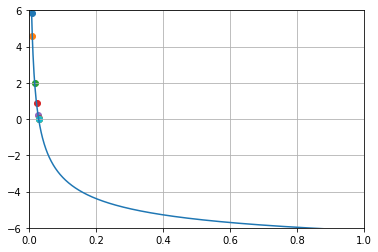

In [4]:
result:List = aproxSec(g, x0, x1, epsilon, n_iter)
print(f"f(x) = 0 para x = {result[0]}")
print(f"(an) = {result[1]}")
print(f"erro = {result[2]}")
plotGraph(g, result[1], epsilon, x1+1)